<a href="https://colab.research.google.com/github/JSK-Sowmith/DataScienceProjects/blob/main/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business case: Delhivery - Feature Engineering
About Delhivery-

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

Problem Statement:

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

#Solution:

First let's import all the necessary libraries-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

Loading the dataset and checking the columns-

In [ ]:
df = pd.read_csv('/content/delhivery_data.txt')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


From the above data it is clearly visible that one trip_uuid is divided into multiple rows based on the short trips as well. This means in this raw data, one complete trip is now shown in one single columns. For every sub trip or for any change in the source and destination is recorded in new row. This is the problem here and the entire trip belonging to one trip_uuid should be brought into one row. For that I will start doing feature engineering by creating new columns and tables by aggregating time and distance.

Removing null values

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

Converting time columns into pandas datatime



In [ ]:
df['od_start_time'] =  pd.to_datetime(df['od_start_time'])
df['od_end_time']  =  pd.to_datetime(df['od_end_time'])

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


Now i'm trying to detect any change in the trip_uuid or source_centre or destination_centre. So i'm Creating a new key "segment_key" which is a sum of trip_uuid, source_centre and destination_center. So that whenever there is a change in anyone of these three, my segment_id will also change.

In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

As per the observation, it is noticed that one single trip is divided into multiple rows according to sub journeys. So here i'm trying to group all those sub journeys into one single journey. For this, first i'm grouping the above created new feature 'segment_key' with the features which are important to identify the sub journeys such as 'segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time' and creating a new list. The resultant list will have values of cumulative sum for above three mentioned features.

In [ ]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()


df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
21748,184.0,84.4074,60.0
21749,33.0,12.4119,16.0
21750,34.0,13.5139,17.0
21751,30.0,10.9859,11.0


Till now, we will get multiple groups which were automatically divided into seperatr groups for single 'trip_uuid' whenever there is a change in the 'source_centre' and 'destination_centre'. Once we get them, then we will group them on trip_uuid level for consolidating all the details of one single trip into one single row.

In [ ]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

I have created a segment dictionary to define which values should be assigned to the corresponding keys.
And now i'm grouping based on segment_key and naming it as segment.

In [ ]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671079956500691IND110024AAAIND110014AAA,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,trip-153671079956500691,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,...,2018-09-12 00:06:39.565253,2018-09-12 00:55:59.568645,49.0,9.872146,23.0,8.0,9.9566,23.0,16.0860,14.0
1,1,trip-153671110078355292IND121004AABIND121001AAA,training,2018-09-12 00:11:40.783923,thanos::sroute:c2ee580f-f4b2-4fa5-98ab-0c5b327...,Carting,trip-153671110078355292,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121001AAA,...,2018-09-12 00:11:40.783923,2018-09-12 00:50:10.814399,38.0,9.396526,17.0,9.0,10.8159,17.0,10.8159,9.0
2,2,trip-153671191949943656IND487001AABIND487551AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487001AAB,Narsinghpur_KndliDPP_D (Madhya Pradesh),IND487551AAA,...,2018-09-12 04:33:09.726898,2018-09-12 05:59:13.062416,86.0,42.630333,78.0,42.0,48.4129,78.0,48.4129,41.0
3,3,trip-153671191949943656IND487551AAAIND464668AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487551AAA,Gadarwara_MPward_D (Madhya Pradesh),IND464668AAA,...,2018-09-12 05:59:13.062416,2018-09-12 09:23:49.463096,204.0,57.345262,175.0,63.0,76.0934,174.0,92.1494,91.0
4,4,trip-153671237597058150IND785690AABIND785682AAA,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,...,2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.0,39.495954,241.0,33.0,46.9087,240.0,56.7577,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,4139,trip-153861089872028474IND602024AAAIND602001AAA,test,2018-10-03 23:54:58.720536,thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...,Carting,trip-153861089872028474,IND602024AAA,Chennai_Vepmpttu_DC (Tamil Nadu),IND602001AAA,...,2018-10-04 02:03:42.668131,2018-10-04 02:57:23.720337,53.0,14.805108,30.0,10.0,15.5366,29.0,15.5367,10.0
4140,4140,trip-153861106442901555IND208006AAAIND209304AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND209304AAA,...,2018-10-04 02:51:27.075797,2018-10-04 06:59:51.621332,248.0,19.349008,190.0,24.0,30.0545,190.0,35.4369,36.0
4141,4141,trip-153861106442901555IND209304AAAIND208006AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND208006AAA,...,2018-10-03 23:57:44.429324,2018-10-04 02:51:27.075797,173.0,19.335831,92.0,24.0,28.8492,91.0,69.4497,52.0
4142,4142,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


For example, below are the sub journey groups for one single trip_uuid divided automatically based on the change in source_centre and destination_centre.

In [ ]:
segment[segment['trip_uuid'] == 'trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
1623,1623,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,...,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,49.4772,44.0
1624,1624,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,...,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,53.2334,44.0


Now i'm calulating the actual time taken for a delivery to deliver. For this i'm subtracting the start time from end time and keeping the resultant value in a new feature.

In [ ]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_time_diff_hour']

,od_time_diff_hour
0,49.333390
1,38.500508
2,86.055592
3,204.606678
4,252.076999
...,...
4139,53.684203
4140,248.409092
4141,173.710775
4142,287.474007


Now lets look at the segment.

In [ ]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671079956500691IND110024AAAIND110014AAA,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,trip-153671079956500691,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,...,2018-09-12 00:55:59.568645,49.0,9.872146,23.0,8.0,9.9566,23.0,16.0860,14.0,49.333390
1,1,trip-153671110078355292IND121004AABIND121001AAA,training,2018-09-12 00:11:40.783923,thanos::sroute:c2ee580f-f4b2-4fa5-98ab-0c5b327...,Carting,trip-153671110078355292,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121001AAA,...,2018-09-12 00:50:10.814399,38.0,9.396526,17.0,9.0,10.8159,17.0,10.8159,9.0,38.500508
2,2,trip-153671191949943656IND487001AABIND487551AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487001AAB,Narsinghpur_KndliDPP_D (Madhya Pradesh),IND487551AAA,...,2018-09-12 05:59:13.062416,86.0,42.630333,78.0,42.0,48.4129,78.0,48.4129,41.0,86.055592
3,3,trip-153671191949943656IND487551AAAIND464668AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487551AAA,Gadarwara_MPward_D (Madhya Pradesh),IND464668AAA,...,2018-09-12 09:23:49.463096,204.0,57.345262,175.0,63.0,76.0934,174.0,92.1494,91.0,204.606678
4,4,trip-153671237597058150IND785690AABIND785682AAA,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,...,2018-09-12 08:00:47.150111,252.0,39.495954,241.0,33.0,46.9087,240.0,56.7577,49.0,252.076999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,4139,trip-153861089872028474IND602024AAAIND602001AAA,test,2018-10-03 23:54:58.720536,thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...,Carting,trip-153861089872028474,IND602024AAA,Chennai_Vepmpttu_DC (Tamil Nadu),IND602001AAA,...,2018-10-04 02:57:23.720337,53.0,14.805108,30.0,10.0,15.5366,29.0,15.5367,10.0,53.684203
4140,4140,trip-153861106442901555IND208006AAAIND209304AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND209304AAA,...,2018-10-04 06:59:51.621332,248.0,19.349008,190.0,24.0,30.0545,190.0,35.4369,36.0,248.409092
4141,4141,trip-153861106442901555IND209304AAAIND208006AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND208006AAA,...,2018-10-04 02:51:27.075797,173.0,19.335831,92.0,24.0,28.8492,91.0,69.4497,52.0,173.710775
4142,4142,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


Now creating a trip dictionary in which we are taking sum value for the features - 'start_scan_to_end_scan',
    'od_time_diff_hour',
    'actual_distance_to_destination',
    'actual_time',
    'osrm_time',
    'osrm_distance',
    'segment_actual_time_sum',
    'segment_osrm_distance_sum',
    'segment_osrm_time_sum'.

In [ ]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

Now we are grouping the different rows belonging to the same trip on trip_uuid and bringing all the information of one delivery to one row.

In [ ]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,trip-153671079956500691,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),49.0,49.333390,9.872146,23.0,8.0,9.9566,23.0,16.0860,14.0
1,training,2018-09-12 00:11:40.783923,thanos::sroute:c2ee580f-f4b2-4fa5-98ab-0c5b327...,Carting,trip-153671110078355292,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121001AAA,Faridabad (Haryana),38.0,38.500508,9.396526,17.0,9.0,10.8159,17.0,10.8159,9.0
2,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487001AAB,Narsinghpur_KndliDPP_D (Madhya Pradesh),IND464668AAA,Bareli_SourvDPP_D (Madhya Pradesh),290.0,290.662270,99.975595,253.0,105.0,124.5063,252.0,140.5623,132.0
3,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,Sivasagar_Babupaty_D (Assam),252.0,252.076999,39.495954,241.0,33.0,46.9087,240.0,56.7577,49.0
4,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,IND500055AAC,Hyderabad_North_D_2 (Telangana),IND500010AAA,Hyderabad_Alwal_I (Telangana),269.0,270.024129,24.359086,195.0,26.0,30.4646,195.0,30.4646,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,test,2018-10-03 23:33:29.015349,thanos::sroute:a02b2c7d-49c4-4c7f-956e-b4b22a1...,Carting,trip-153860960901509071,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),148.0,148.172525,49.732416,128.0,41.0,57.1276,127.0,67.7456,47.0
2281,test,2018-10-03 23:45:48.025062,thanos::sroute:1396edcd-faad-4029-a574-f71a85a...,Carting,trip-153861034802474617,IND245101AAA,Hapur_Swargash_D (Uttar Pradesh),IND201007AAA,GZB_Mohan_Nagar_DPC (Uttar Pradesh),148.0,148.794718,44.106290,123.0,50.0,46.5093,121.0,48.5795,50.0
2282,test,2018-10-03 23:54:58.720536,thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...,Carting,trip-153861089872028474,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602001AAA,Chennai_Thiruvlr_DC (Tamil Nadu),181.0,182.416663,27.010926,62.0,28.0,38.2867,61.0,33.6400,33.0
2283,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0


So for each trip_uuid we have only one row.

Performing hypothesis testing.

In [ ]:
from scipy import stats

a. Between actual_time aggregated value and OSRM time aggregated value.

first checking the standard deviation between them, so that we can understand which test is appropriate.

In [ ]:
print("Standard deviantion of actual_time is: ",round(trip['actual_time'].std(), 2))
print("Standard deviantion of osrm_time is: ",round(trip['osrm_time'].std(), 2))

Standard deviantion of actual_time is:  519.25
Standard deviantion of osrm_time is:  257.37


As the Standard deviantions are diffent, so the two sample independent t-test will be the appropriate test for this problem.

In [ ]:
from scipy.stats import ttest_ind # T-test for independent samples

In [ ]:
# Defining the p_value function
def calculate_p(p_value, alpha):
  if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
  else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Null Hypothesis: There is no significant effect of the actual time on the OSRM time. This means that any observed differences are due to random chance or sampling error.                              Alternate Hypothesis:  There is a significant effect of the actual time on the OSRM time. This means that the observed difference is not due to random chance.

In [ ]:
alpha = 0.05
# Now calculating p-value
actual_time = trip['actual_time']
osrm_time = trip['osrm_time']
test_stat, p_value = ttest_ind(actual_time,osrm_time, equal_var=False, alternative="less")
print(f'The p_value is : {p_value}')
calculate_p(p_value=p_value, alpha=alpha)

The p_value is : 1.0
As the p-value 1.0 is greater than the level of significance, we fail to reject the null hypothesis.


So there is no significant effect of the actual time on the OSRM time.

b. Between actual_time aggregated value and segment actual time aggregated value.

In [ ]:
# Checking standard deviation
print("Standard deviantion of actual_time is: ",round(trip['actual_time'].std(), 2))
print("Standard deviantion of segment_actual_time_sum	 is: ",round(trip['segment_actual_time_sum'].std(), 2))

Standard deviantion of actual_time is:  519.25
Standard deviantion of segment_actual_time_sum	 is:  514.43


As the standard deviation for the categories is almost close to each other here we should use the ttest_rel function.

Null Hypothesis: There is no significant effect of the segment actual time on the segment actual time aggregate. This means that any observed differences are due to random chance or sampling error.                              
 Alternate Hypothesis:  There is a significant effect of the segment actual time on the segment actual time aggregate. This means that the observed difference is not due to random chance.

In [ ]:
from scipy.stats import ttest_rel

# Perform paired t-test
test_stat, p_value = ttest_rel(trip['actual_time'], trip['segment_actual_time_sum'], alternative="less")
print(f'The p_value is : {p_value}')
calculate_p(p_value=p_value, alpha=alpha)

The p_value is : 1.0
As the p-value 1.0 is greater than the level of significance, we fail to reject the null hypothesis.


So there is no significant effect of the segment actual time on the segment actual time aggregate time.

c. Between OSRM distance aggregated value and segment OSRM distance
aggregated value.

In [ ]:
# Checking standard deviation
print("Standard deviantion of osrm_distance is: ",round(trip['osrm_distance'].std(), 2))
print("Standard deviantion of segment_osrm_distance_sum is: ",round(trip['segment_osrm_distance_sum'].std(), 2))

Standard deviantion of osrm_distance is:  350.37
Standard deviantion of segment_osrm_distance_sum is:  392.41


Null Hypothesis: There is no significant effect of the OSRM distance aggregate on the segment OSRM distance aggregate. This means that any observed differences are due to random chance or sampling error.                              
 Alternate Hypothesis:  There is a significant effect of the OSRM distance aggregate on the segment OSRM distance aggregate. This means that the observed difference is not due to random chance.

In [ ]:
test_stat, p_value = ttest_ind(trip['osrm_distance'],trip['segment_osrm_distance_sum'],equal_var=False, alternative="less")
print(f'The p_value is : {p_value}')
calculate_p(p_value=p_value, alpha=alpha)

The p_value is : 0.05536269537625778
As the p-value 0.05536269537625778 is greater than the level of significance, we fail to reject the null hypothesis.


So there is a significant evidence that the OSRM distance aggregate is not effecting the segment OSRM distance aggregate.

d. Between OSRM time aggregated value and segment OSRM time aggregated
value.

In [ ]:
# Checking standard deviation
print("Standard deviantion of osrm_time is: ",round(trip['osrm_time'].std(), 2))
print("Standard deviantion of segment_osrm_time_sum is: ",round(trip['segment_osrm_time_sum'].std(), 2))

Standard deviantion of osrm_time is:  257.37
Standard deviantion of segment_osrm_time_sum is:  295.66


Null Hypothesis: There is no significant effect of the OSRM time aggregate on the segment OSRM time aggregate. This means that any observed differences are due to random chance or sampling error.                              
 Alternate Hypothesis:  There is a significant effect of the OSRM time aggregate on the segment OSRM time aggregate. This means that the observed difference is not due to random chance.

In [ ]:
test_stat, p_value = ttest_ind(trip['osrm_time'],trip['segment_osrm_time_sum'], alternative="less")
print(f'The p_value is : {p_value}')
calculate_p(p_value=p_value, alpha=alpha)

The p_value is : 0.49999999999999867
As the p-value 0.49999999999999867 is greater than the level of significance, we fail to reject the null hypothesis.


So there is a significant evidence that the OSRM time aggregate is not effecting the segment OSRM time aggregate.

To calculate which route is more busy and getting more orders and also which are emerging routes first we should calculate number of orders or deliceries in each route. For that we shall do feature engineering for bringing  all the similar routes under one state, city and pincode. If the number of trips are more that means that route is busy.

In [ ]:
#Converting all the string values to lower case.
trip['destination_name'] = trip['destination_name'].str.lower() #lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [ ]:
def place2state(x):
    state = x.split('(')[1] # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    return state[:-1] #removing ')' from ending
def place2city(x):
    city = x.split(' (')[0]  # We will remove state
    city = city.split('_')[0]
    return city
def place2city_place(x):
    x = x.split(' (')[0] # We will remove state
    len_ = len(x.split('_'))
    if len_ >= 3:
        return x.split('_')[1]
    if len_ == 2: # Small cities have same city and place name
        return x.split('_')[0]
    # Now we need to deal with edge cases or imporper name convention
    #if len(x.split(' ')) == 2:
    return x.split(' ')[0]
def place2code(x):
    x = x.split(' (')[0] # We will remove state
    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]
    return 'none'


Making different columns out of the avove seggregation

Splitting between source and destination.

In [ ]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [ ]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,delhi,delhi,delhi,none
1,haryana,faridabad,faridabad,none
2,madhya pradesh,bareli,sourvdpp,d
3,assam,sivasagar,babupaty,d
4,telangana,hyderabad,alwal,i
...,...,...,...,...
2280,maharashtra,chalisgaon,bhadgdpp,d
2281,uttar pradesh,gzb,mohan,dpc
2282,tamil nadu,chennai,thiruvlr,dc
2283,uttar pradesh,kanpur,govndngr,dc


In [ ]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [ ]:
trip[['source_state', 'source_city', 'source_place', 'source_code']]

,source_state,source_city,source_place,source_code
0,delhi,delhi,lajpat,ip
1,haryana,fbd,balabhgarh,dpc
2,madhya pradesh,narsinghpur,kndlidpp,d
3,assam,sonari,central,1
4,telangana,hyderabad,north,2
...,...,...,...,...
2280,maharashtra,dhule,midcavdn,i
2281,uttar pradesh,hapur,swargash,d
2282,tamil nadu,chennai,porur,dpc
2283,uttar pradesh,kanpur,govndngr,dc


By converting trip_creation time into pandas datetime, we will get yearn month, hour, day etc.

In [ ]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])

In [ ]:
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [ ]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
2280,2018,10,23,3,40,2
2281,2018,10,23,3,40,2
2282,2018,10,23,3,40,2
2283,2018,10,23,3,40,2


In [ ]:
trip.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,trip-153671079956500691,IND110024AAA,delhi_lajpat_ip (delhi),IND110014AAA,delhi_bhogal (delhi),49.0,...,delhi,delhi,lajpat,ip,2018,9,0,12,37,2
1,training,2018-09-12 00:11:40.783923,thanos::sroute:c2ee580f-f4b2-4fa5-98ab-0c5b327...,Carting,trip-153671110078355292,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121001AAA,faridabad (haryana),38.0,...,haryana,fbd,balabhgarh,dpc,2018,9,0,12,37,2
2,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487001AAB,narsinghpur_kndlidpp_d (madhya pradesh),IND464668AAA,bareli_sourvdpp_d (madhya pradesh),290.0,...,madhya pradesh,narsinghpur,kndlidpp,d,2018,9,0,12,37,2
3,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,IND785690AAB,sonari_central_dpp_1 (assam),IND785682AAA,sivasagar_babupaty_d (assam),252.0,...,assam,sonari,central,1,2018,9,0,12,37,2
4,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,IND500055AAC,hyderabad_north_d_2 (telangana),IND500010AAA,hyderabad_alwal_i (telangana),269.0,...,telangana,hyderabad,north,2,2018,9,0,12,37,2


Starting analysis on this data. For this, creating  a new feature 'num_cols' and plotting a box plot to detect outliers.

In [ ]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

<Axes: >

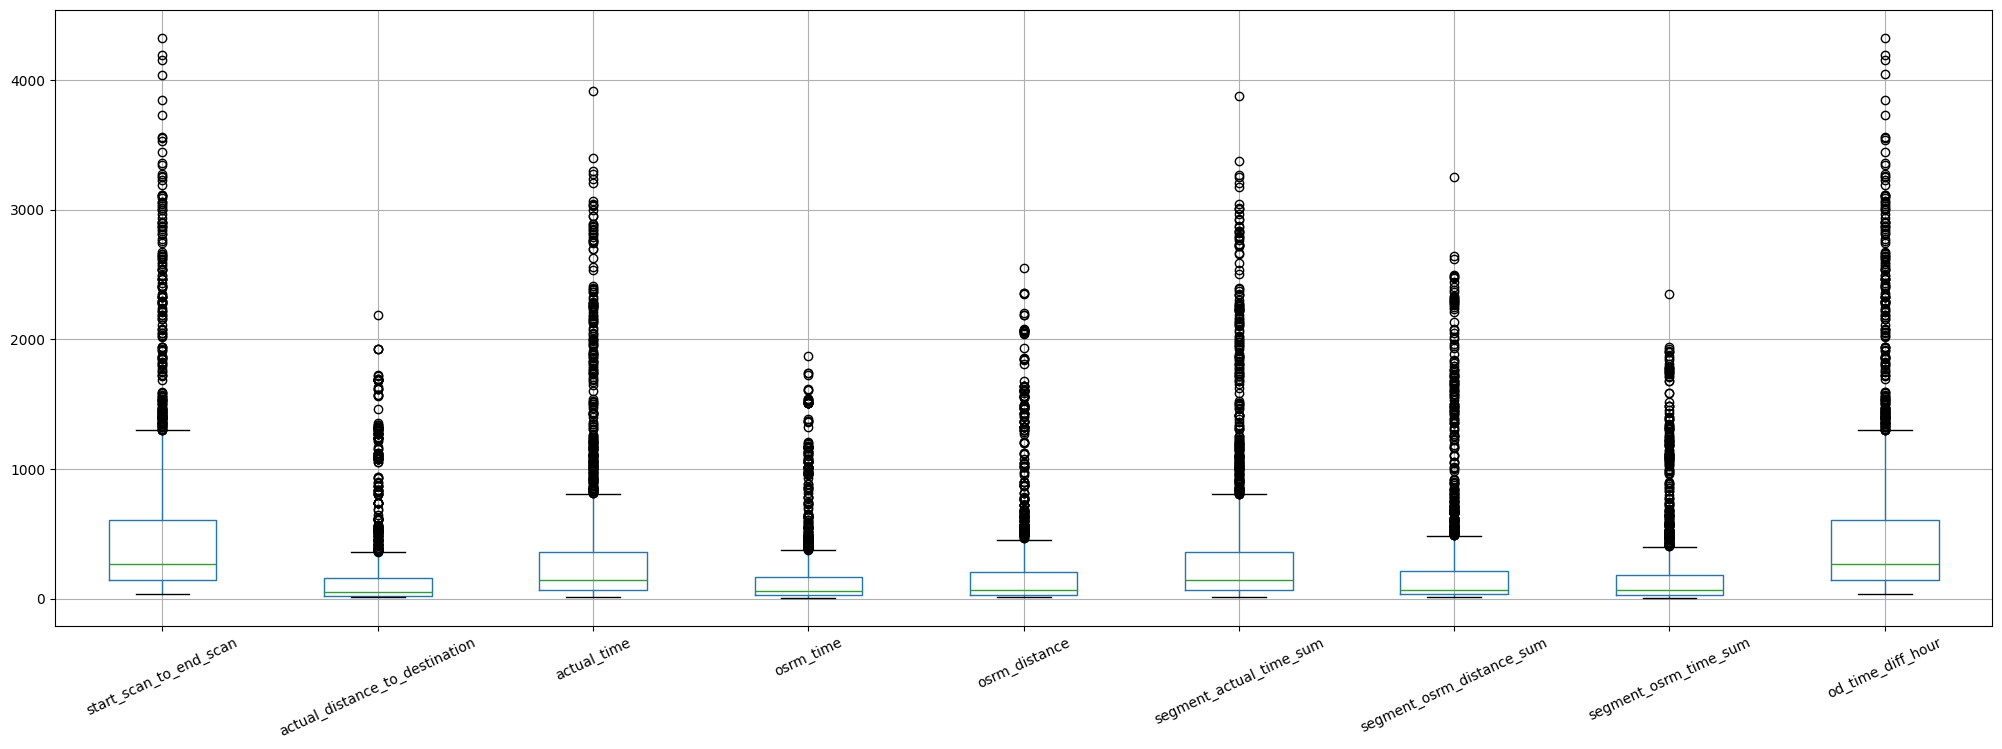

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

Handling the outliers using IQR method.

In [ ]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

Keeping a cap on top and lowest values

In [ ]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,trip-153671079956500691,IND110024AAA,delhi_lajpat_ip (delhi),IND110014AAA,delhi_bhogal (delhi),49.0,...,delhi,delhi,lajpat,ip,2018,9,0,12,37,2
1,training,2018-09-12 00:11:40.783923,thanos::sroute:c2ee580f-f4b2-4fa5-98ab-0c5b327...,Carting,trip-153671110078355292,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121001AAA,faridabad (haryana),38.0,...,haryana,fbd,balabhgarh,dpc,2018,9,0,12,37,2
2,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487001AAB,narsinghpur_kndlidpp_d (madhya pradesh),IND464668AAA,bareli_sourvdpp_d (madhya pradesh),290.0,...,madhya pradesh,narsinghpur,kndlidpp,d,2018,9,0,12,37,2
3,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,IND785690AAB,sonari_central_dpp_1 (assam),IND785682AAA,sivasagar_babupaty_d (assam),252.0,...,assam,sonari,central,1,2018,9,0,12,37,2
4,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,IND500055AAC,hyderabad_north_d_2 (telangana),IND500010AAA,hyderabad_alwal_i (telangana),269.0,...,telangana,hyderabad,north,2,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,test,2018-10-03 23:33:29.015349,thanos::sroute:a02b2c7d-49c4-4c7f-956e-b4b22a1...,Carting,trip-153860960901509071,IND424006AAA,dhule_midcavdn_i (maharashtra),IND424101AAA,chalisgaon_bhadgdpp_d (maharashtra),148.0,...,maharashtra,dhule,midcavdn,i,2018,10,23,3,40,2
1982,test,2018-10-03 23:45:48.025062,thanos::sroute:1396edcd-faad-4029-a574-f71a85a...,Carting,trip-153861034802474617,IND245101AAA,hapur_swargash_d (uttar pradesh),IND201007AAA,gzb_mohan_nagar_dpc (uttar pradesh),148.0,...,uttar pradesh,hapur,swargash,d,2018,10,23,3,40,2
1983,test,2018-10-03 23:54:58.720536,thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...,Carting,trip-153861089872028474,IND600116AAB,chennai_porur_dpc (tamil nadu),IND602001AAA,chennai_thiruvlr_dc (tamil nadu),181.0,...,tamil nadu,chennai,porur,dpc,2018,10,23,3,40,2
1984,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2


As per the data i can see outliers has been reduced. Let's see the same by visualizing through a box plot.

<Axes: >

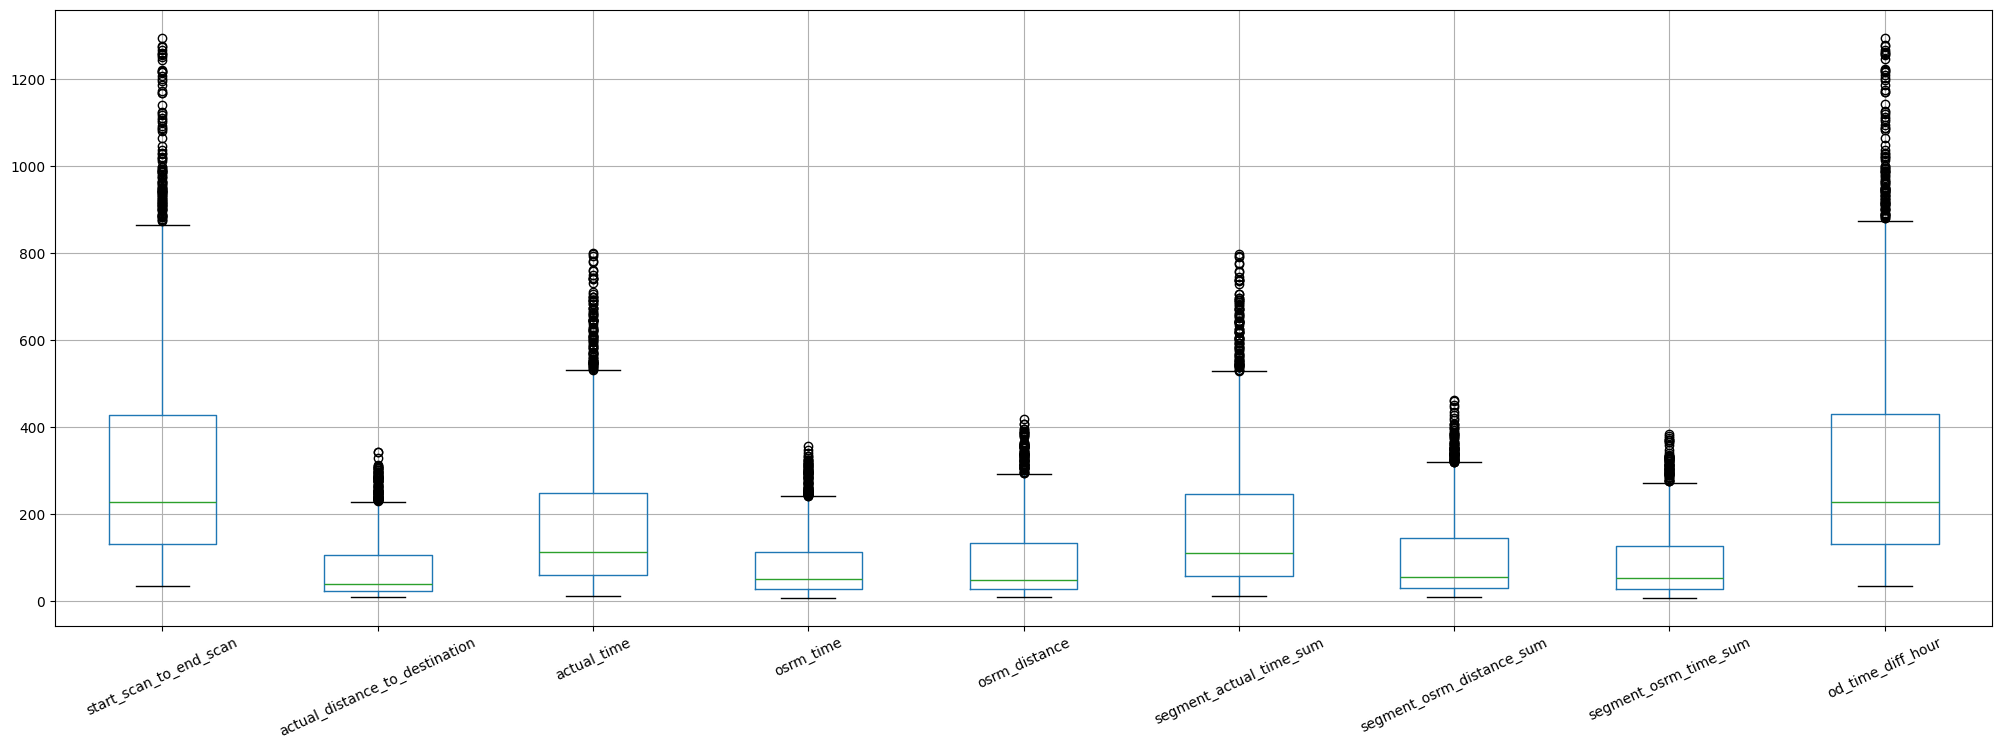

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

Handling Categorical Variables usind one hot encoding

In [ ]:
trip['route_type'].value_counts()

,count
route_type,
Carting,1379
FTL,607


There are two categories in route_type. So encoding them with 0 and 1.

In [ ]:
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

Importing the standard scaler library.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [ ]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [ ]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-1.054879,-0.872072,-0.956823,-0.969271,-0.915508,-0.952665,-0.868305,-0.904649,-1.055515
1,-1.098275,-0.878647,-0.994066,-0.955661,-0.905948,-0.990144,-0.923914,-0.967024,-1.098193
2,-0.104092,0.373619,0.470854,0.350872,0.358909,0.477776,0.445130,0.567398,-0.104762
3,-0.254009,-0.462519,0.396366,-0.629028,-0.504399,0.402819,-0.439150,-0.468025,-0.256775
4,-0.186941,-0.671788,0.110831,-0.724296,-0.687347,0.121728,-0.716587,-0.754949,-0.186069
...,...,...,...,...,...,...,...,...,...
1981,-0.664307,-0.320999,-0.305057,-0.520150,-0.390709,-0.303032,-0.323209,-0.492975,-0.666123
1982,-0.664307,-0.398781,-0.336094,-0.397663,-0.508843,-0.340511,-0.525444,-0.455550,-0.663671
1983,-0.534116,-0.635126,-0.714738,-0.697076,-0.600323,-0.715299,-0.683081,-0.667625,-0.531212
1984,0.412725,-0.473733,0.650865,-0.424882,-0.370950,0.658924,0.068691,0.018499,0.413136


In [ ]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.986000e+03,1.986000e+03,1.986000e+03,1.986000e+03,1.986000e+03,1.986000e+03,1.986000e+03,1986.000000,1.986000e+03
mean,-5.903301e-17,-2.647541e-16,-2.504431e-17,-1.037550e-16,9.659947e-17,8.944395e-17,-1.395326e-16,0.000000,6.261076e-18
std,1.000252e+00,1.000252e+00,1.000252e+00,1.000252e+00,1.000252e+00,1.000252e+00,1.000252e+00,1.000252,1.000252e+00
min,-1.114056e+00,-8.840429e-01,-1.031310e+00,-9.828805e-01,-9.246334e-01,-1.027623e+00,-9.416353e-01,-0.991974,-1.113866e+00
25%,-7.313745e-01,-7.140542e-01,-7.333603e-01,-7.242959e-01,-7.128378e-01,-7.340387e-01,-7.316477e-01,-0.742475,-7.326754e-01
50%,-3.526380e-01,-4.706089e-01,-4.043740e-01,-4.112725e-01,-4.842979e-01,-4.092223e-01,-4.735775e-01,-0.430600,-3.535094e-01
75%,4.393553e-01,4.404619e-01,4.398174e-01,4.427372e-01,4.601736e-01,4.402974e-01,4.892320e-01,0.492548,4.398256e-01
max,3.856860e+00,3.737824e+00,3.866241e+00,3.766910e+00,3.618297e+00,3.888348e+00,3.828672e+00,3.711091,3.854548e+00


Column standardization is done.

Business Insights:
There is a significant difference between OSRM and actual parameters by observing the hypothesis tests.

#Recommendations:

1. Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.

2. North, South and West Zones corridors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.

3. From state point of view, we have heavy traffic in Maharashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.